# Chicago Bulls and Crime
## The effect a Chicago Bulls win/lose streak has on Crime in Chicago

### Contents
- Data Preparation
- Chicago Bulls results
- Crime in Chicago
- Chicago Bulls Form
- Chicago Bulls Streaks

In [95]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [96]:
if not os.path.exists( "../../data/prep/600_NBA.csv" ):
    print("Missing dataset file")

In [97]:
nba = pd.read_csv("../../data/prep/600_NBA.csv", index_col="Date", parse_dates=True)
nba.shape

(5354, 8)

Sorting the dates of the games...

In [98]:
nba.sort_index(ascending=True)

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9
2007-10-31,7:00 pm,Philadelphia 76ers,97,Toronto Raptors,106,19800.0,Home Win,-9
2007-11-02,8:00 pm,Washington Wizards,83,Boston Celtics,103,18624.0,Home Win,-20
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21


# Chicago Bulls

We'll look at the Chicago Bulls...

In [99]:
bul = nba[(nba.values  == "Chicago Bulls")]

In [100]:
bul.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11
2007-11-03,7:30 pm,Chicago Bulls,72,Milwaukee Bucks,78,18717.0,Home Win,-6
2007-11-06,7:30 pm,Los Angeles Clippers,97,Chicago Bulls,91,21742.0,Away Win,6
2007-11-08,7:00 pm,Detroit Pistons,93,Chicago Bulls,97,21797.0,Home Win,-4


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [101]:
bulHome = bul[bul['Home/Neutral'] == 'Chicago Bulls']

In [102]:
conditions = [
    (bulHome['PTS.1'] > bulHome['PTS']),
    (bulHome['PTS'] == bulHome['PTS.1'])]
choices = [1, 0]
bulHome['bul Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [103]:
bulHome.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,bul Res
Date,,,,,,,,,
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11,-1
2007-11-06,7:30 pm,Los Angeles Clippers,97,Chicago Bulls,91,21742.0,Away Win,6,-1
2007-11-08,7:00 pm,Detroit Pistons,93,Chicago Bulls,97,21797.0,Home Win,-4,1
2007-11-10,7:30 pm,Toronto Raptors,101,Chicago Bulls,71,22467.0,Away Win,30,-1
2007-11-27,7:30 pm,Atlanta Hawks,78,Chicago Bulls,90,21826.0,Home Win,-12,1


and now their away games...

In [104]:
bulAway = bul[bul['Visitor/Neutral'] == 'Chicago Bulls']

In [105]:
conditions = [
    (bulAway['PTS'] > bulAway['PTS.1']),
    (bulAway['PTS'] == bulAway['PTS.1'])]
choices = [1, 0]
bulAway['bul Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [106]:
bulAway.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,bul Res
Date,,,,,,,,,
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9,-1
2007-11-03,7:30 pm,Chicago Bulls,72,Milwaukee Bucks,78,18717.0,Home Win,-6,-1
2007-11-15,8:30 pm,Chicago Bulls,102,Phoenix Suns,112,18422.0,Home Win,-10,-1
2007-11-17,7:30 pm,Chicago Bulls,92,Los Angeles Clippers,73,17535.0,Away Win,19,1
2007-11-18,6:30 pm,Chicago Bulls,78,Los Angeles Lakers,106,18997.0,Home Win,-28,-1


We'll combine the 2 dataframes

In [107]:
fram1 = [bulHome, bulAway]
bulRes = pd.concat(fram1, axis = 0)

In [108]:
bulRes.tail()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,bul Res
Date,,,,,,,,,
2017-04-06,7:00 pm,Chicago Bulls,102,Philadelphia 76ers,90,15177.0,Away Win,12,1
2017-04-08,5:00 pm,Chicago Bulls,106,Brooklyn Nets,107,17732.0,Home Win,-1,-1
2017-04-16,6:30 pm,Chicago Bulls,106,Boston Celtics,102,18624.0,Away Win,4,1
2017-04-18,8:00 pm,Chicago Bulls,111,Boston Celtics,97,18624.0,Away Win,14,1
2017-04-26,8:30 pm,Chicago Bulls,97,Boston Celtics,108,18624.0,Home Win,-11,-1


The index is sorted again

In [109]:
bulRes = bulRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

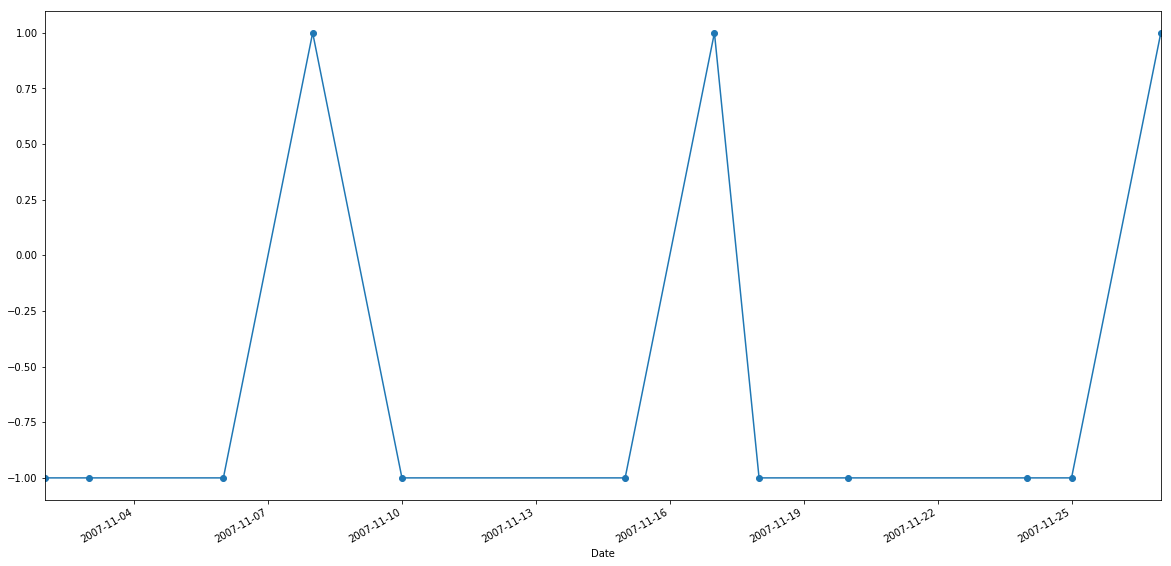

In [110]:
ctest2 = bulRes.loc['2007-11-02':'2007-11-30']
ctest2['bul Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [111]:
ctest3 = bulRes.loc['2009-11-02':'2010-06-30']
ctest3

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,bul Res
Date,,,,,,,,,
2009-11-03,7:00 pm,Milwaukee Bucks,81,Chicago Bulls,83,19789.0,Home Win,-2,1
2009-11-05,8:00 pm,Chicago Bulls,86,Cleveland Cavaliers,85,20562.0,Away Win,1,1
2009-11-07,7:00 pm,Charlotte Bobcats,90,Chicago Bulls,93,21108.0,Home Win,-3,1
2009-11-10,7:00 pm,Denver Nuggets,90,Chicago Bulls,89,21409.0,Away Win,1,-1
2009-11-11,7:00 pm,Chicago Bulls,89,Toronto Raptors,99,16310.0,Home Win,-10,-1
2009-11-14,7:00 pm,Philadelphia 76ers,88,Chicago Bulls,94,21837.0,Home Win,-6,1
2009-11-17,7:00 pm,Chicago Bulls,101,Sacramento Kings,87,12634.0,Away Win,14,1
2009-11-19,7:30 pm,Chicago Bulls,93,Los Angeles Lakers,108,18997.0,Home Win,-15,-1
2009-11-21,7:00 pm,Chicago Bulls,93,Denver Nuggets,112,19359.0,Home Win,-19,-1


The unnecessary columns are now dropped...

In [112]:
bulRes= bulRes.drop('Visitor/Neutral', 1)
bulRes= bulRes.drop('PTS', 1)
bulRes= bulRes.drop('Home/Neutral', 1)
bulRes= bulRes.drop('Attend.', 1)
bulRes= bulRes.drop('PTS.1', 1)
bulRes= bulRes.drop('Result', 1)
bulRes= bulRes.drop('Difference', 1)

The irrelevant dates are filtered out...

In [113]:
start_remove = pd.to_datetime('2017-12-31')
end_remove = pd.to_datetime('2007-01-01')

In [114]:
bulRes = bulRes.loc[(bulRes.index < start_remove) & (bulRes.index > end_remove)]

In [115]:
bulRes.head()

,Start (ET),bul Res
Date,,
2007-10-31,7:30 pm,-1
2007-11-02,7:30 pm,-1
2007-11-03,7:30 pm,-1
2007-11-06,7:30 pm,-1
2007-11-08,7:00 pm,1


# Chicago Crime

We now load in the Chicago crime dataset...

In [116]:
bulcrime = pd.read_csv("../../data/prep/110_Chicago.csv", index_col="Date", parse_dates=True)

Looking at crimes year by year...

<function matplotlib.pyplot.show>

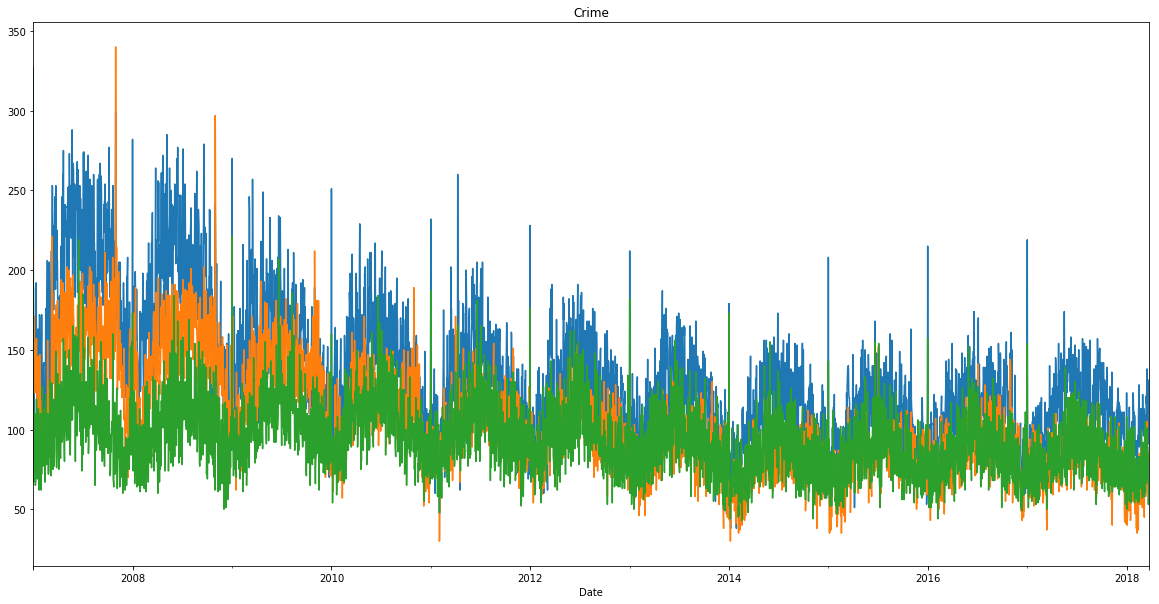

In [139]:
plt.subplot()

a1p = bulcrime[bulcrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = bulcrime[bulcrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = bulcrime[bulcrime['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()

plt.title('Crime')

plt.show

<function matplotlib.pyplot.show>

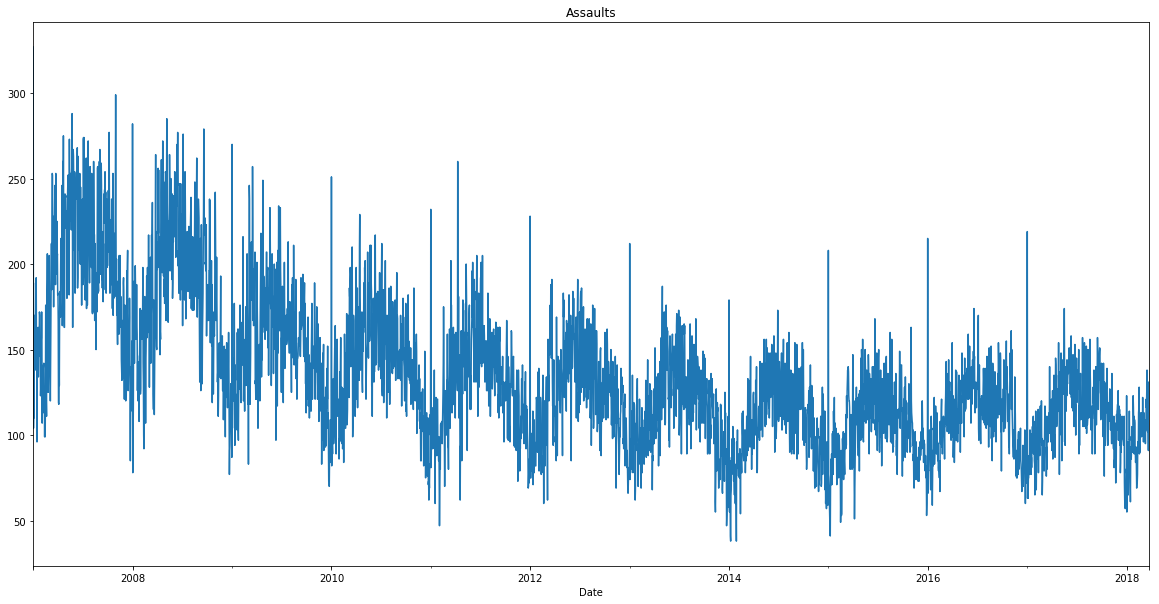

In [140]:
plt.subplot()

a1p = bulcrime[bulcrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('Assaults')

plt.show

<function matplotlib.pyplot.show>

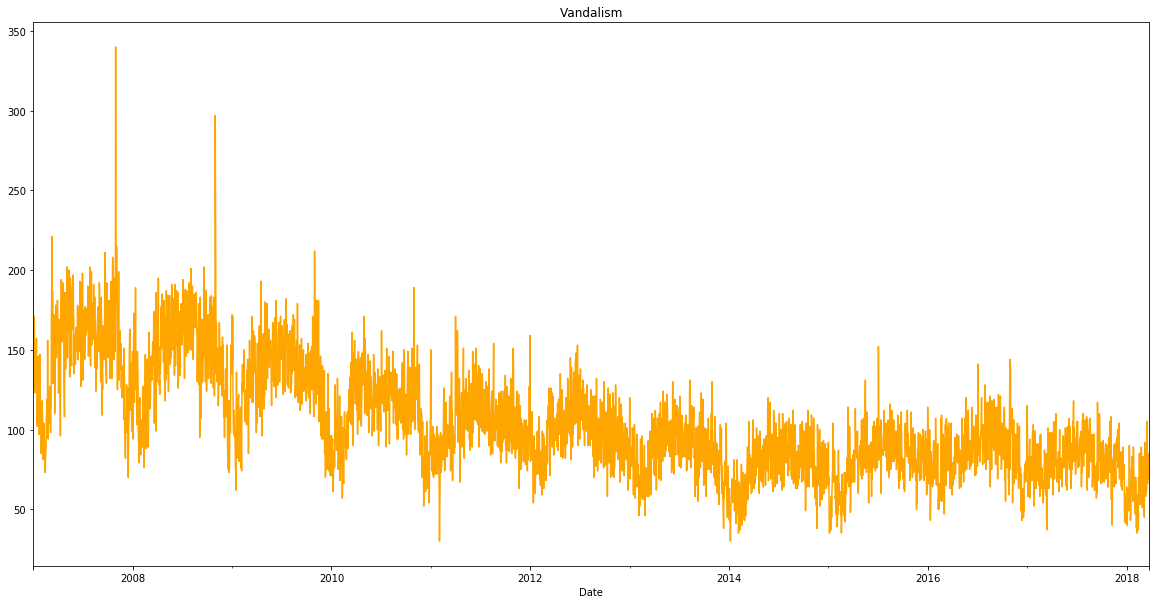

In [141]:
plt.subplot()


v1p = bulcrime[bulcrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('Vandalism')

plt.show

<function matplotlib.pyplot.show>

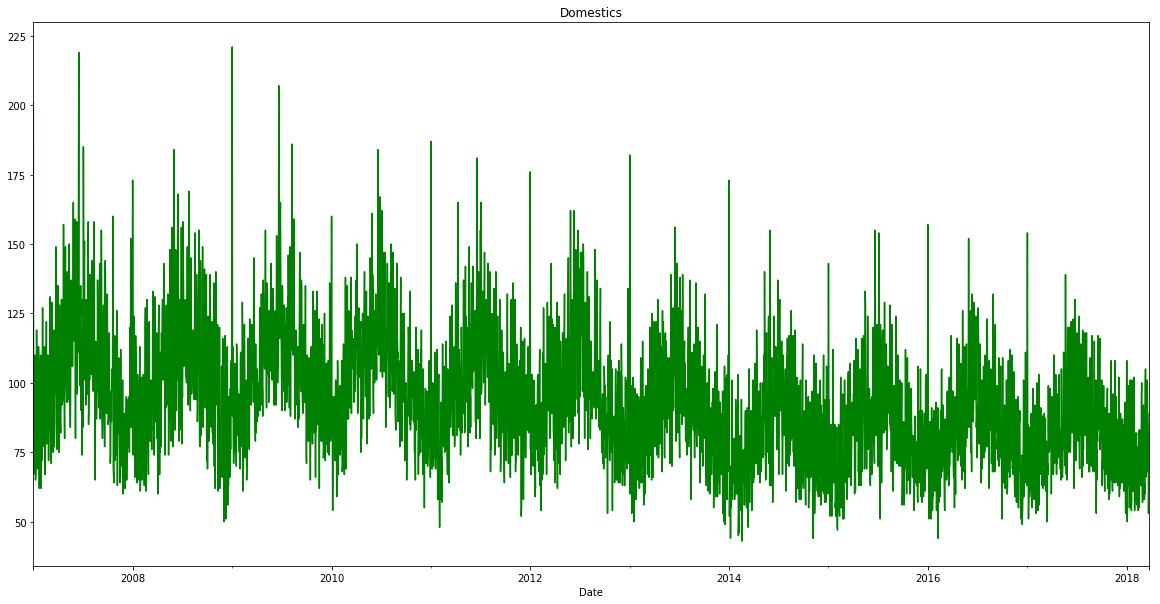

In [142]:
plt.subplot()

a1p = bulcrime[bulcrime['Primary Type'] == "Domestic"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('Domestics')

plt.show

# Crime vs Results

A day by day comparison of domestic violence and the games..

<function matplotlib.pyplot.show>

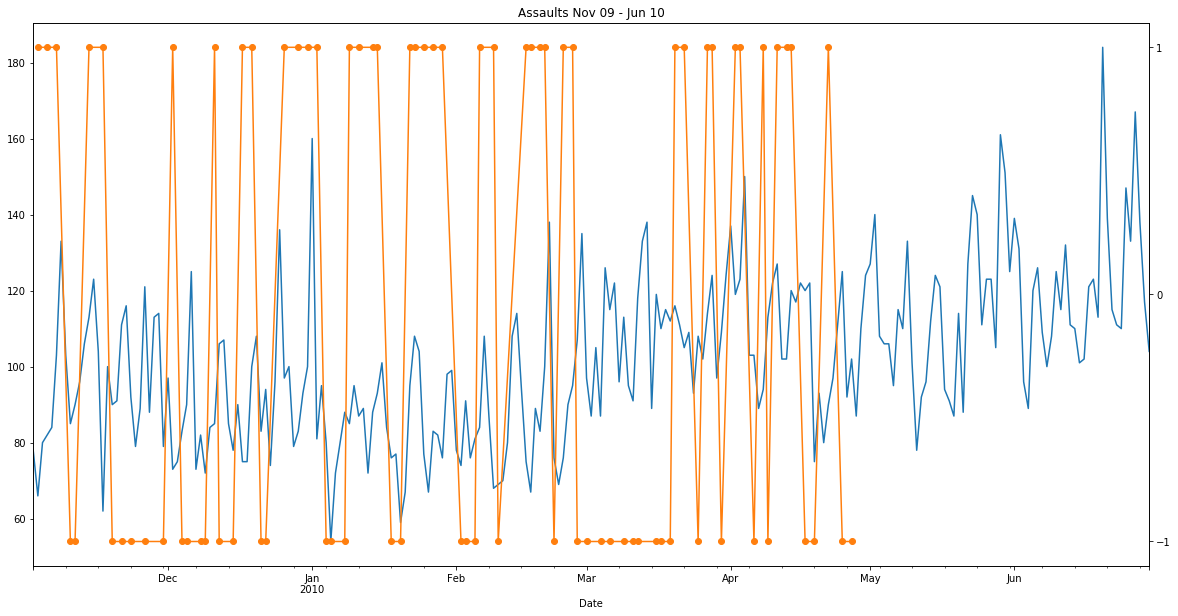

In [121]:

c1 = bulcrime.loc['2009-11-02':'2010-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Assaults Nov 09 - Jun 10')

ctest5 = bulRes.loc['2009-11-02':'2010-06-30']
ctest5['bul Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

All seasons from 2007-2017...

<function matplotlib.pyplot.show>

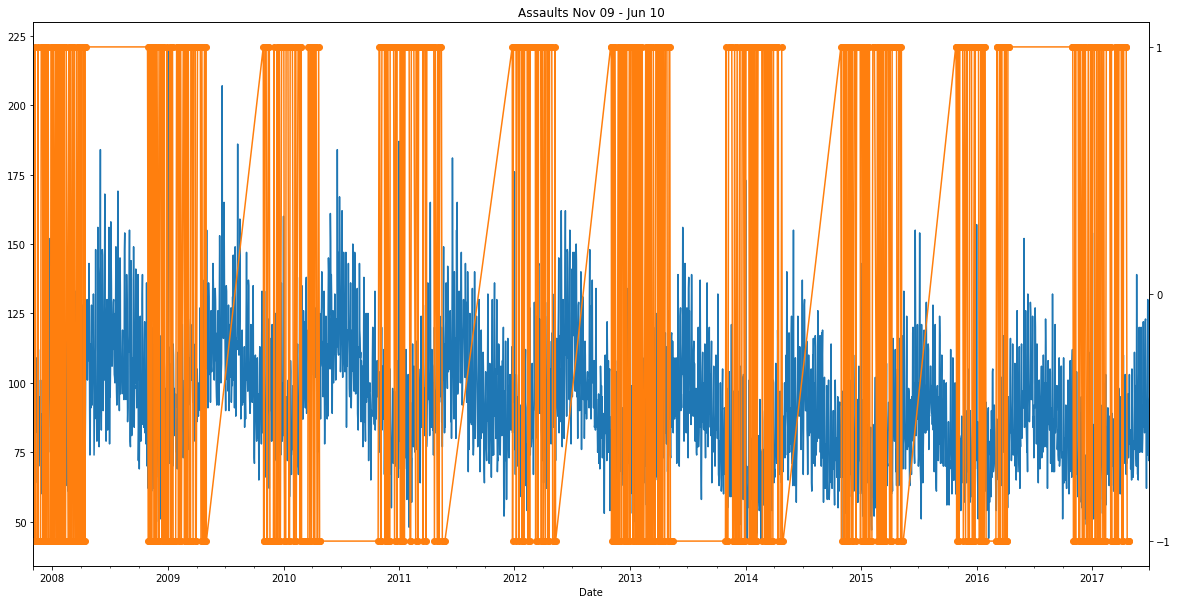

In [122]:
c1 = bulcrime.loc['2007-11-02':'2017-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Assaults Nov 09 - Jun 10')

ctest7 = bulRes.loc['2007-11-02':'2017-06-30']
ctest7['bul Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

The 11/12 season was shorter

<function matplotlib.pyplot.show>

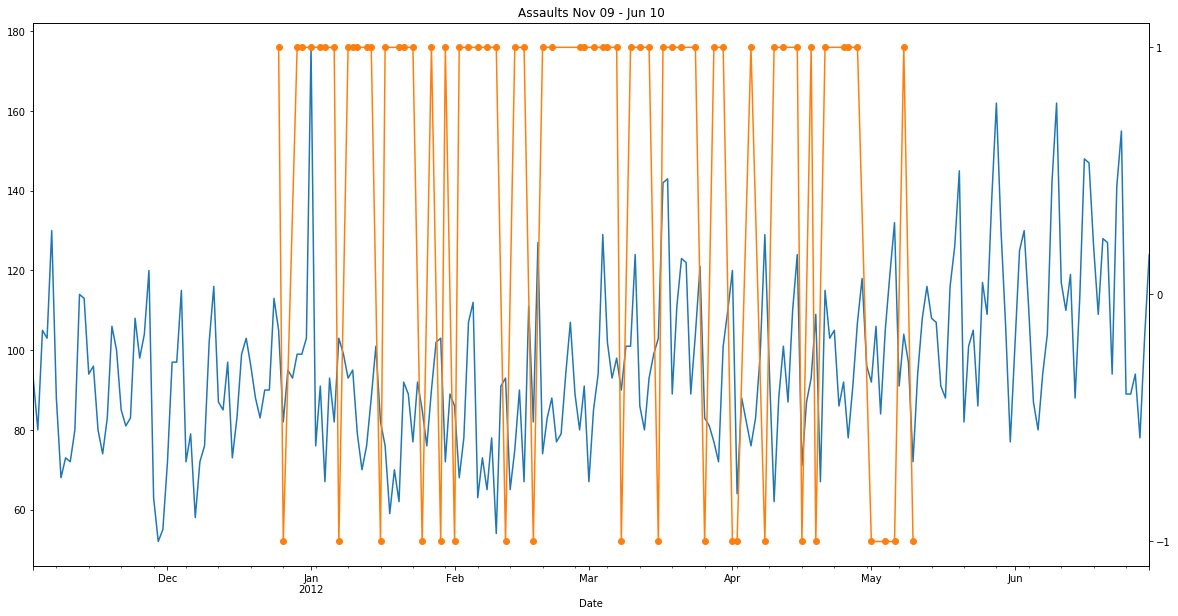

In [123]:
c1 = bulcrime.loc['2011-11-02':'2012-06-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.title('Assaults Nov 09 - Jun 10')

ctest8 = bulRes.loc['2011-11-02':'2012-06-30']
ctest8['bul Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

# Chicago Bulls Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was between Novemnber 2007 and December 2007 when their form was -6. The highest was from March to April 2011 with a sum of 21.  

In [124]:
chMonthly = bulRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['bul Res'])
chMonthly.sort_values(by=['bul Res'])

,bul Res
Date,
2007-12-31,-6.0
2013-12-31,-6.0
2010-04-30,-6.0
2008-02-29,-5.0
2016-12-31,-5.0
2008-04-30,-4.0
2008-12-31,-4.0
2009-12-31,-4.0
2012-06-30,-3.0


Showing the best form with all three crimes...

<function matplotlib.pyplot.show>

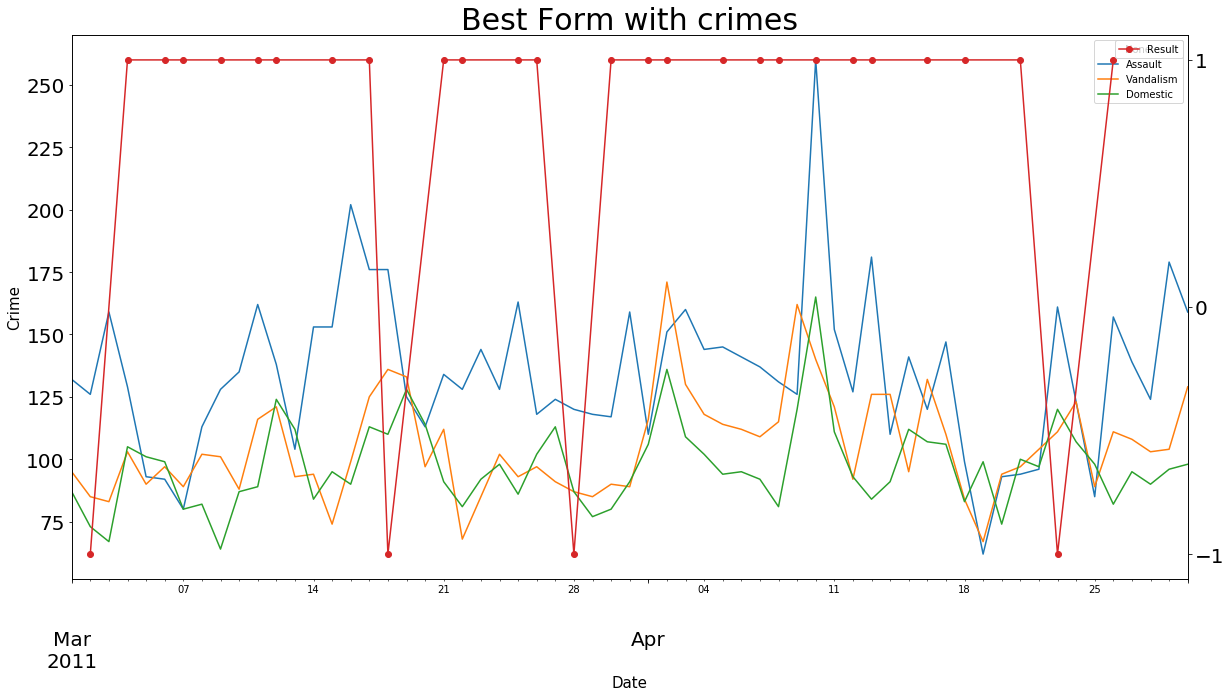

In [125]:
plt.subplot()

c = bulcrime.loc['2011-03-01':'2011-04-30']
a1 = c[c['Primary Type'] == "Assault"]['Primary Type']
a1.resample('D').count().plot()

v1 = c[c['Primary Type'] == "Vandalism"]['Primary Type']
v1.resample('D').count().plot()

d1 = c[c['Primary Type'] == "Domestic"]['Primary Type']
d1.resample('D').count().plot()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Best Form with crimes', fontsize = 30)

ct = bulRes.loc['2011-03-01':'2011-04-30']
ct['bul Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(["Result"])
plt.show

All three crimes rise in this period despite numerous win streaks and very good form. A large spike in occurs for assault in the middle of a very good period. One notable thing is the rise in all three crimes when a game is lost at the end of April. 

Showing the worst form with all three crimes...

<function matplotlib.pyplot.show>

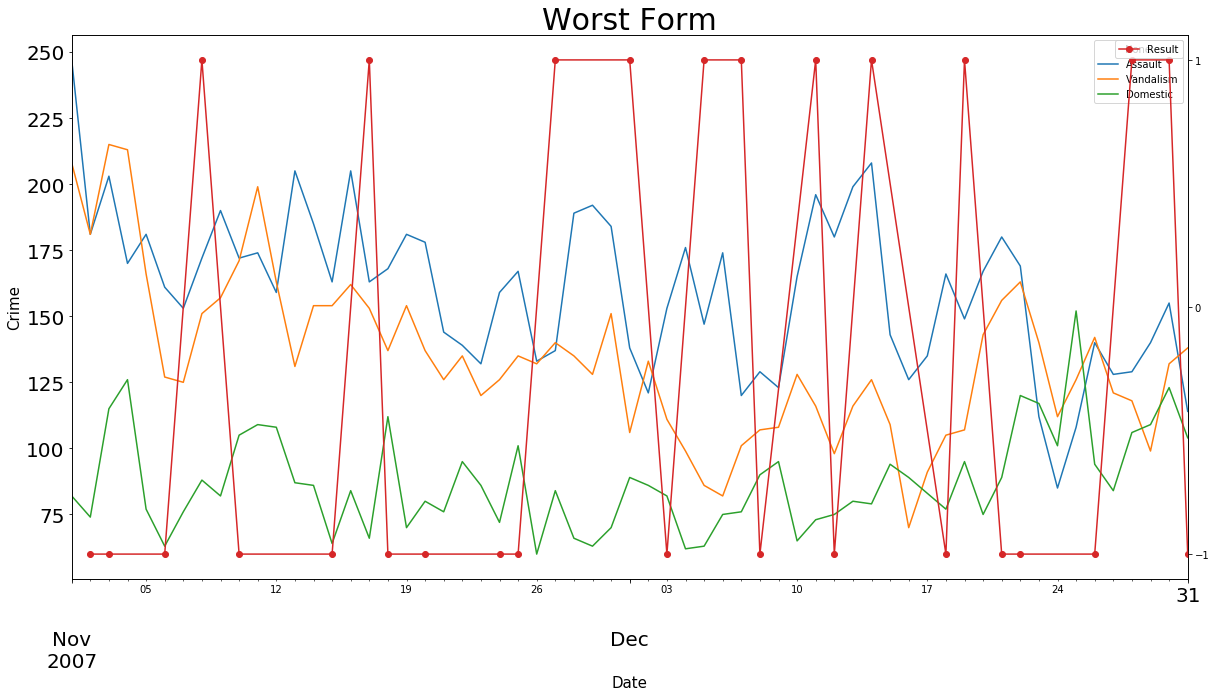

In [126]:
plt.subplot()

cp = bulcrime.loc['2007-11-01':'2007-12-31']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)

plt.title('Worst Form', fontsize = 30)
plt.legend(['Assault', 'Vandalism', 'Domestic'])

ctp = bulRes.loc['2007-11-01':'2007-12-31']
ctp['bul Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Assault and Vandalism drop in this period of bad form, while domestic violence sees a rise. However, the highest point of each vandalism and domestic violence came after a loss, while the second and third largest domestic count also comes after a loss. 

# Chicago Bulls Win/Lose Streaks

A function to create streak columns

In [127]:
def streaks(bulRes, col):
    sign = np.sign(bulRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return bulRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

#the sign of each cell present in the column under consideration using np.sign is computed. 
#+1 to positive numbers and -1 to the negative.
#sign!=sign.shift() compares to next cell 
# get cumulitive sum
#get cumulutive sum of sub group
#assign the positive computed cumsum values to win_streak 
#assign the negative computed cumsum values to lose_streak 

Running that function and adding it to the bulRes dataframe..

In [128]:
bulRes = streaks(bulRes, 'bul Res')

In [129]:
bulRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 2007-10-31 to 2017-04-28
Data columns (total 4 columns):
Start (ET)     861 non-null object
bul Res        861 non-null int32
lose_streak    861 non-null float64
win_streak     861 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 30.3+ KB


Sorting the dataframe by the losing streak column..

In [130]:
bulRes.sort_values(by=['lose_streak'], ascending= False).head()

,Start (ET),bul Res,lose_streak,win_streak
Date,,,,
2010-03-19,7:00 pm,-1,10.0,0.0
2010-03-17,7:30 pm,-1,9.0,0.0
2010-03-16,7:00 pm,-1,8.0,0.0
2010-03-12,7:30 pm,-1,7.0,0.0
2010-03-11,8:00 pm,-1,6.0,0.0


Analysing the period where the worst losing streak occurred...

<function matplotlib.pyplot.show>

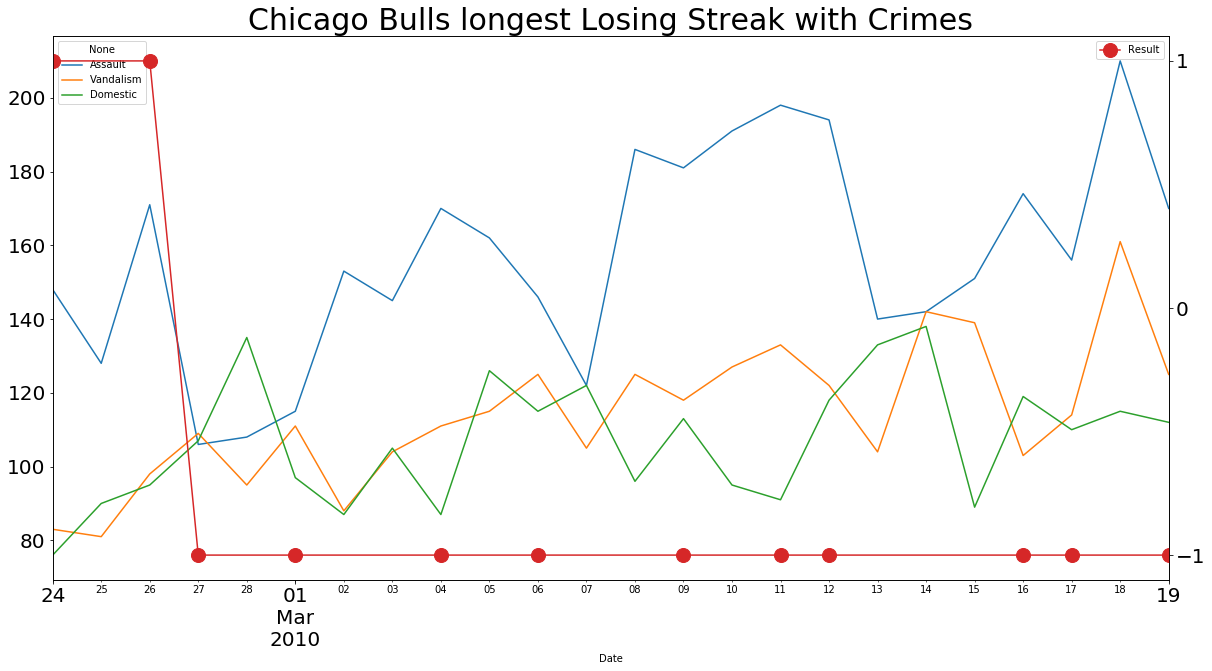

In [131]:
plt.subplot()

cp = bulcrime.loc['2010-02-24':'2010-03-19']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Chicago Bulls longest Losing Streak with Crimes', fontsize = 30)


ctp = bulRes.loc['2010-02-24':'2010-03-19']
ctp['bul Res'].plot(style='o-', ms=14, figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show

Text(0.5,1,'Chicago Bulls longest Losing Streak with Crimes')

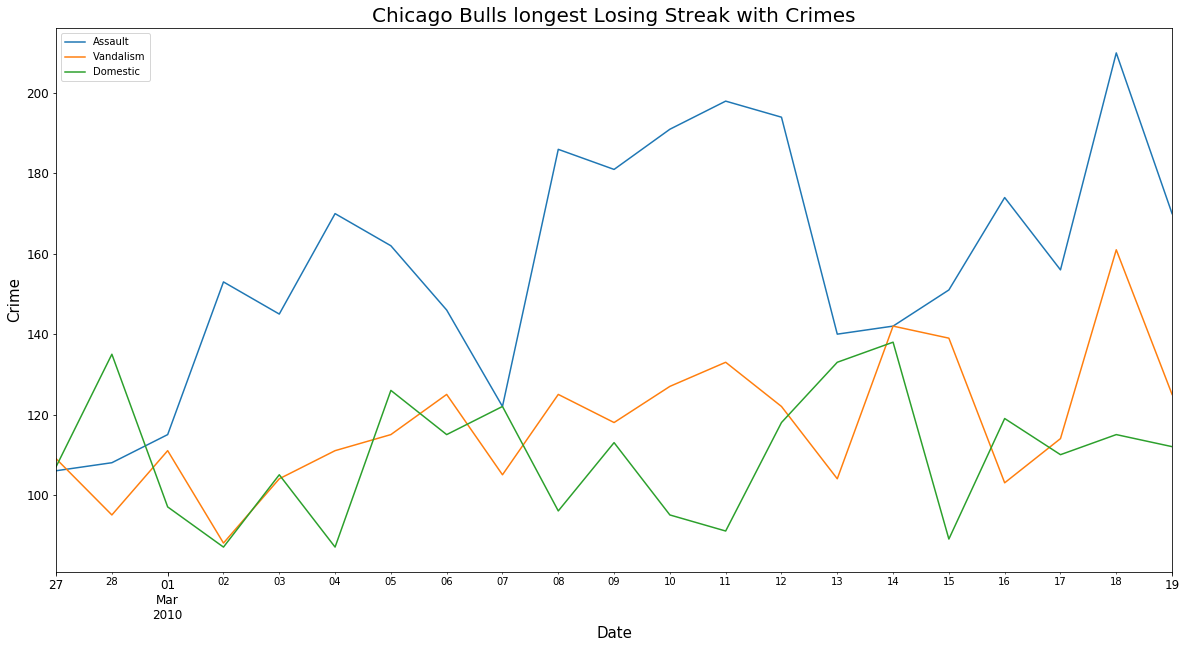

In [132]:
plt.subplot()

cp = bulcrime.loc['2010-02-27':'2010-03-19']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Chicago Bulls longest Losing Streak with Crimes', fontsize = 20)


There is a significant rise in Assault in this period. It rises to over 200 incidents per day at the very end of the losing streak. Domestic violence and Vandalism also see slight rises from the start of the losing streak. 

Sorting the dataframe by the win streak column

In [133]:
bulRes.sort_values(bulRes.columns[3], ascending = False).head()

,Start (ET),bul Res,lose_streak,win_streak
Date,,,,
2011-04-21,7:00 pm,1,0.0,12.0
2011-04-18,8:30 pm,1,0.0,11.0
2011-04-16,12:00 pm,1,0.0,10.0
2011-04-13,7:00 pm,1,0.0,9.0
2011-04-12,8:00 pm,1,0.0,8.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

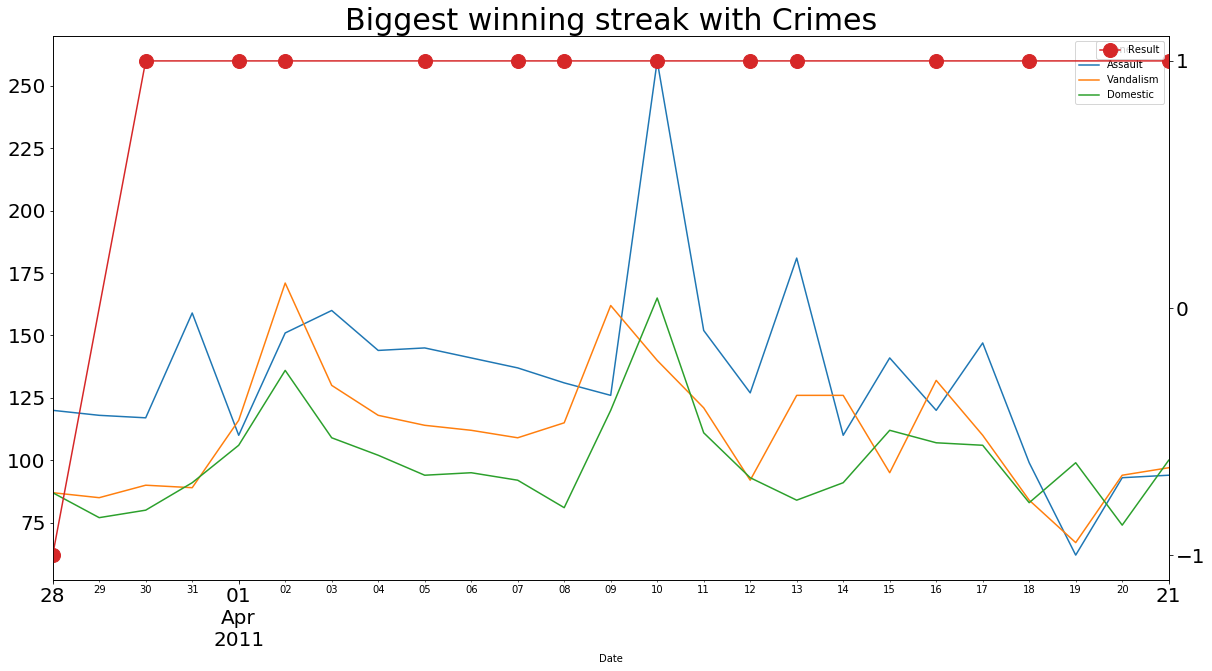

In [134]:
plt.subplot()

cp = bulcrime.loc['2011-03-28':'2011-04-21']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Biggest winning streak with Crimes', fontsize = 30)

ctp = bulRes.loc['2011-03-28':'2011-04-21']
ctp['bul Res'].plot(style='o-', ms=14, figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show

Text(0.5,1,'Biggest winning streak with Crimes')

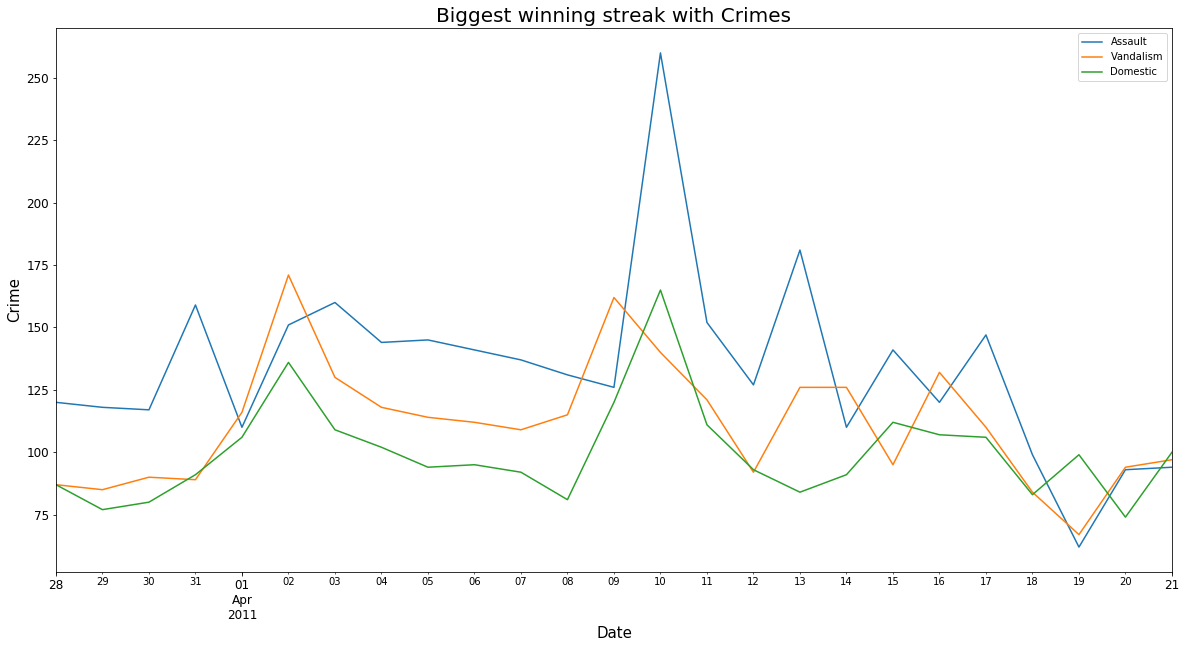

In [135]:
plt.subplot()

cp = bulcrime.loc['2011-03-28':'2011-04-21']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Biggest winning streak with Crimes', fontsize = 20)

Overall, you can see the number of domestic crimes at the start of the streak is higher than at the end. However, in the middle of the streak there is a massive rise to more than 250. For vandalism and assault the begining of the streak actually sees possibly the lowest amount. 

### Comparing Longest Streaks

In [136]:
cp = bulcrime.loc['2010-02-27':'2010-03-19']

print('Daily average for Losing Streak:')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = bulcrime.loc['2011-03-30':'2011-04-21']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 158.0952380952381
Vandalism = 117.9047619047619
Domestic = 110.0
 
Daily average for Winning Streak:
Assault = 135.08695652173913
Vandalism = 113.47826086956522
Domestic = 101.34782608695652


As you can see the daily average of crimes is significantly less when the team is on a winning streak. In each of the three crimes there is a reduction. Is this because the team has gone on a winning streak though? Both streaks are in the Spring period, and only 1 year apart, so it can't be said that the reduction is due to time. Both streaks are also near the business end of the season which means the games are of more importance. 

### Comparing with periods before Streaks

In [137]:
cp = bulcrime.loc['2011-03-07':'2011-03-29']

print('Period before Winninng Streak')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = bulcrime.loc['2011-03-30':'2011-04-21']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winninng Streak
Assault = 136.30434782608697
Vandalism = 99.47826086956522
Domestic = 95.6086956521739
 
Period of Winning Streak:
Assault = 135.08695652173913
Vandalism = 113.47826086956522
Domestic = 101.34782608695652


Judging by the numbers the win streak does not seem to have a positive effect on crime. 

In [138]:
cp = bulcrime.loc['2010-02-05':'2010-02-27']

print('Period before Losing Streak')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Losing Streak:')

cp0 = bulcrime.loc['2010-02-27':'2010-03-19']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Period before Losing Streak
Assault = 118.82608695652173
Vandalism = 89.6086956521739
Domestic = 88.17391304347827
 
Period of Losing Streak:
Assault = 158.0952380952381
Vandalism = 117.9047619047619
Domestic = 110.0


There is a huge increase in crime. Is this because of the losing streak? Assault rises by 40 per day on average in a short period of time. Vandalism rises by 28 on average, and domestic by 22 on average. These are very significant rises during this 10 game losing streak. 